# Budget64

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.defchararray import add as npStrAdd
tdata = pd.read_pickle('Transaction.pkl')
bdata = pd.read_pickle('Budget.pkl')
months = np.array(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

([<matplotlib.patches.Wedge at 0x25c35634160>,
 [Text(0.9668351890432901, 0.5246234051466115, 'Utilities (15.8%)'),
  Text(-1.0590586039819845, 0.2973127533956961, 'Shopping (59.6%)'),
  Text(0.2507474780100944, -1.071039542814166, 'Transport (6.39%)'),
  Text(0.7967104758438704, -0.7584539654327306, 'Groceries (12.0%)'),
  Text(1.0800322178138413, -0.20863942217163992, 'Eat-Out (6.07%)')])

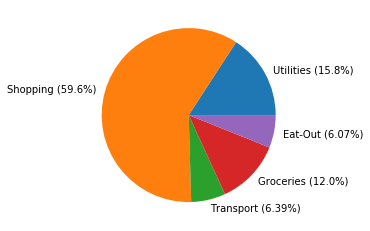

In [38]:
month = 7
year = 2019

mask = (tdata['Date'].dt.year == year) & (tdata['Date'].dt.month == month)
df = tdata[mask]

cats = df['Category'].unique().astype('str')
total = np.zeros(cats.shape)
for i in range(cats.shape[0]):
    total[i] = df[df['Category'] == cats[i]]['Amt'].sum()

ratio = (total *100 / sum(total)).astype('|S4').astype('str')
cats = npStrAdd( npStrAdd(npStrAdd(cats,' (') , ratio) , '%)')
fig, ax = plt.subplots()
ax.pie(total, labels=cats)


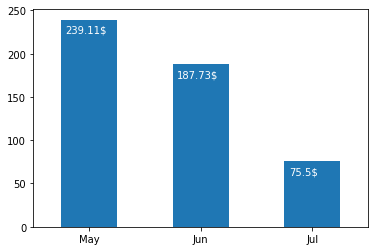

In [39]:
cat = 'Groceries'
year = 2019

mask = (tdata['Date'].dt.year == year) & (tdata['Category'] == cat)
df = tdata[mask]
grouped = df.groupby(by=df['Date'].dt.month)['Amt'].sum()
grouped.index = pd.CategoricalIndex(months[grouped.index])

fig, ax = plt.subplots()
ax = grouped.plot.bar(x='Date', y='Amt', rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '$', (p.get_x()+0.04, p.get_height() - 15), c='white')

,Budget,Amt
Cash,350,NaN
Eat-Out,300,38.00
Groceries,300,75.50
House,2080,NaN
Shopping,400,373.09
Transport,300,40.00
Utilities,150,99.00


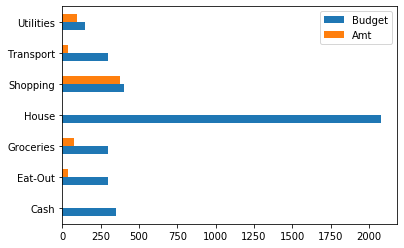

In [43]:
month = 7
year = 2019

tmask = (tdata['Date'].dt.year == year) & (tdata['Date'].dt.month == month)
bmask = (bdata['Month'].dt.year == year) & (bdata['Month'].dt.month == month)
df = tdata[tmask]

budget = bdata[bmask]['Budget']
budget.index = pd.CategoricalIndex(bdata[bmask]['Category'])

cats = df['Category'].unique().astype('str')
total = np.zeros(cats.shape)
for i in range(cats.shape[0]):
    total[i] = df[df['Category'] == cats[i]]['Amt'].sum()

grouped = pd.Series(total, name='Amt', index=pd.CategoricalIndex(cats))

df = pd.concat([budget, grouped], axis=1)
df = df.dropna(axis=0, how='all')
fig, ax = plt.subplots()
df.plot.barh(ax=ax)
plt.legend()    

df